In [5]:
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import scipy.stats as stats

plt.rcParams['figure.figsize'] = [10, 8]

In [6]:
mat = loadmat('./Data/32541_1_2022_Jun_17_1139_V_cued_r_time.mat')

# mat

In [7]:
data = []
i = 0
for key in mat:
    if not key.startswith('__'):
        data.append(mat[key])
        print("[" + str(i) + "] " + key)
        print(mat[key])
        print("")
        i += 1

n_trials = data[0].size
trial_types = np.unique(data[0])
print("Number of trials: " + str(n_trials))

[0] triallist
[[3 1 3 3 1 3 4 1 2 1 4 3 4 2 3 3 4 4 1 4 4 1 1 3 4 3 3 1 2 4 4 2 3 2 1 2
  3 2 2 1 1 4 2 3 1 4 3 4 2 1 3 4 4 2 2 4 2 3 4 3 1 4 3 3 2 2 4 2 1 3 3 1
  4 3 3 2 1 2 2 1 3 3 2 3 4 2 3 1 4 2 4 1 2 3 2 4 4 2 1 2 4 2 4 1 3 3 2 3
  3 1 1 4 2 2 4 4 1 3 3 3 3 1 4 1 4 4 1 2 1 3 1 4 3 1 2 4 3 2 3 1 4 4 4 1
  1 4 2 4 2 1 1 3 1 4 1 4 2 2 2 4 3 3 2 4 4 1 1 1 2 2 3 2 4 4 1 2 3 1 1 3
  3 2 1 4 3 2 1 3 2 3 4 2 1 1 4 2 2 1 1 2]]

[1] stimonset
[[ 57.1380562  61.1737296  65.0192408  69.2272928  72.5298452  75.7189052
   79.13388    82.6357791  86.4145599  90.0496871  93.6364375  97.2917051
  100.839005  104.3289919 108.4875837 112.9368454 126.5172897 130.7059118
  134.4671163 138.078864  142.1548759 146.0585122 150.2174142 154.216725
  157.9672788 161.9088472 164.8325186 169.6018494 174.1590008 178.6918114
  181.8495406 184.9287298 198.9268495 202.2894158 206.6425567 210.0628097
  214.7546259 217.7512008 222.5412273 225.683541  230.1119608 233.3177228
  237.957564  242.639327  245.6759443 24

In [8]:
times = []

for trial in trial_types:
    temp = []
    for i,element in enumerate(data[0][0]):
        if trial == element and not data[2][0][i] == 99.0:
            temp.append(data[2][0][i])
    times.append(np.array(temp))
    print("Trial " + str(trial) + " times: ")
    print(temp)
    print("")

Trial 1 times: 
[0.4565158002078533, 0.43654340133070946, 0.48380690068006516, 0.46380000188946724, 0.47621290013194084, 0.481717299669981, 0.4739013984799385, 0.4732822999358177, 0.5435480996966362, 0.49953319877386093, 0.6413323022425175, 0.5542320981621742, 0.6432265006005764, 0.4849318005144596, 0.4172768034040928, 0.3803001008927822, 0.4537148028612137, 0.4497560001909733, 0.37034109979867935, 0.41797399893403053, 0.4482739008963108, 0.3986048996448517, 0.5347873009741306, 0.6005786992609501, 0.38833320140838623, 0.42320819944143295, 0.4495457001030445, 0.4235799014568329, 0.40563369914889336, 0.41126779839396477, 0.4510236009955406, 0.43892740085721016, 0.46843359991908073, 0.3711448013782501, 0.3979502022266388, 0.4951057992875576, 0.39041460305452347, 0.4373086020350456, 0.3908128999173641, 0.40333810076117516, 0.4103402979671955, 0.4218630976974964, 0.6061030998826027, 0.46381400153040886, 0.46691809967160225, 0.3334416002035141, 0.40833720192313194, 0.36079060286283493, 0.376

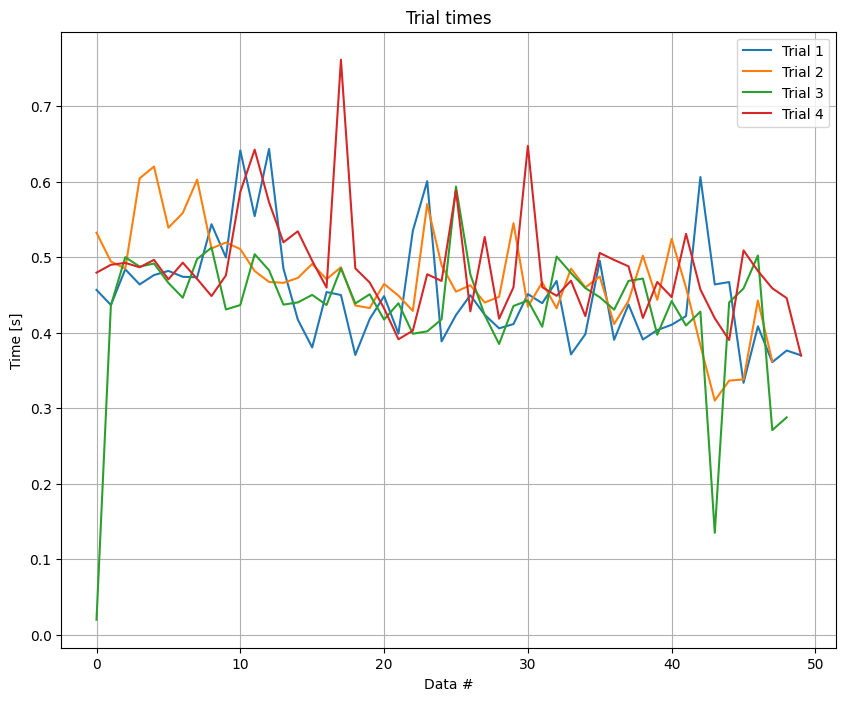

In [9]:
plt.title("Trial times")
plt.xlabel("Data #")
plt.ylabel("Time [s]")

for i in trial_types:
    plt.plot(times[i-1], label="Trial " + str(i))

plt.legend()
plt.grid()

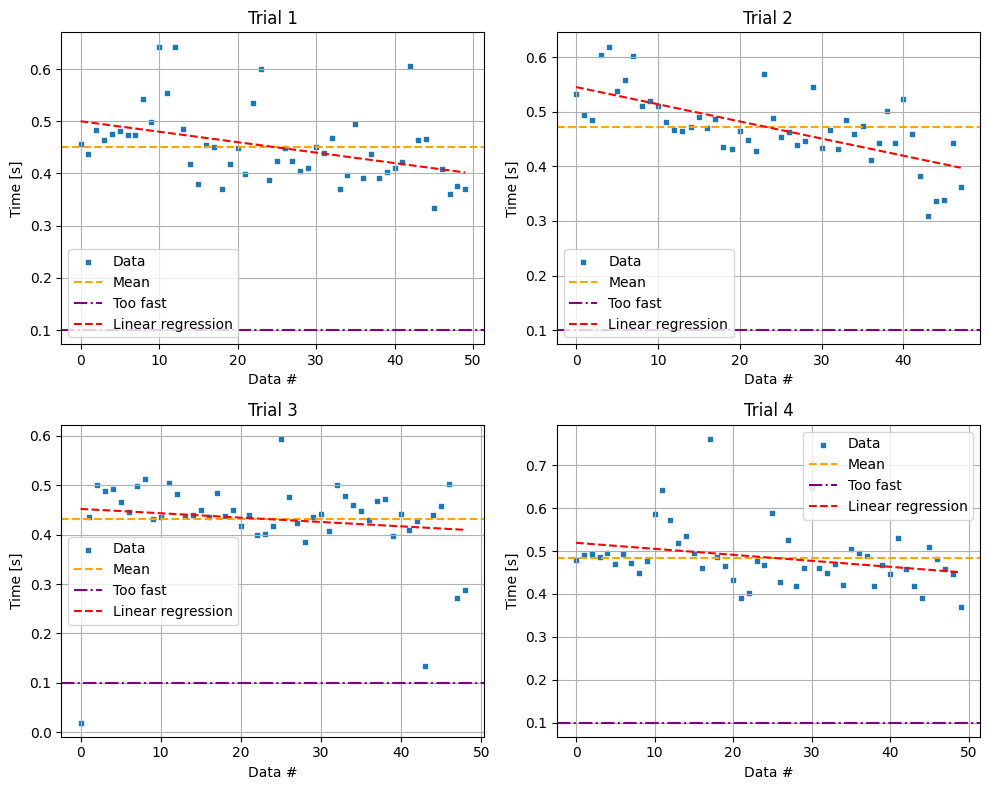

In [15]:
mean_times = []
sd_times = []
max_times = []
min_times = []
median_times = []

for i,time in enumerate(times):
    mean = np.mean(time)
    sd = np.std(time)
    max = np.max(time)
    min = np.min(time)
    median = np.median(time)

    mean_times.append(mean)
    sd_times.append(sd)
    max_times.append(max)
    min_times.append(min)
    median_times.append(median)

fig, axs = plt.subplots(2, 2)
for i, ax in enumerate(axs.flatten(), 1):
    trial_data = times[i-1]
    num = np.arange(0, len(trial_data))

    m, q = np.polyfit(num, trial_data, 1)
    fitted = m * num + q

    # ax.plot(trial_data, label = 'Data')
    ax.scatter(num, trial_data, label = 'Data', marker = 's', s=10)
    ax.axhline(mean_times[i-1], color = 'orange', linestyle = '--', label = 'Mean')
    ax.axhline(0.1, color = 'purple', linestyle = '-.', label = 'Too fast')
    ax.plot(num, fitted, color = 'red', linestyle = '--', label = 'Linear regression')
    ax.set_title("Trial " + str(i))
    ax.set_ylabel("Time [s]")
    ax.set_xlabel("Data #")
    ax.grid()
    ax.legend()
plt.tight_layout()

In [11]:
filtered_times = []
mean_times_filtered = []
sd_times_filtered = []
max_times_filtered = []
min_times_filtered = []
median_times_filtered = []

for i,time in enumerate(times):
    filtered_time = time[time > 0.1]
    filtered_times.append(filtered_time)

    mean = np.mean(filtered_time)
    sd = np.std(filtered_time)
    max = np.max(filtered_time)
    min = np.min(filtered_time)
    median = np.median(filtered_time)

    mean_times_filtered.append(mean)
    sd_times_filtered.append(sd)
    max_times_filtered.append(max)
    min_times_filtered.append(min)
    median_times_filtered.append(median)

    print("Trial " + str(i+1) + ":")
    print("Max: " + str(max_times[i]))
    print("Min: " + str(min_times[i]))
    print("Mean: " + str(mean_times[i]))
    print("Median: " + str(median_times[i]))
    print("Standard deviation: " + str(sd_times[i]) + "\n")

    print("Trial " + str(i+1) + " (FILTERED):")
    print("Max: " + str(max))
    print("Min: " + str(min))
    print("Mean: " + str(mean))
    print("Median: " + str(median))
    print("Standard deviation: " + str(sd) + "\n")

Trial 1:
Max: 0.6432265006005764
Min: 0.3334416002035141
Mean: 0.45095848843455316
Median: 0.4436006508767605
Standard deviation: 0.06917086780722032

Trial 1 (FILTERED):
Max: 0.6432265006005764
Min: 0.3334416002035141
Mean: 0.45095848843455316
Median: 0.4436006508767605
Standard deviation: 0.06917086780722032

Trial 2:
Max: 0.6199393980205059
Min: 0.30993619933724403
Mean: 0.47160084972468513
Median: 0.4667800012975931
Standard deviation: 0.06413195341754568

Trial 2 (FILTERED):
Max: 0.6199393980205059
Min: 0.30993619933724403
Mean: 0.47160084972468513
Median: 0.4667800012975931
Standard deviation: 0.06413195341754568

Trial 3:
Max: 0.5934680998325348
Min: 0.019611500203609467
Mean: 0.43083709364338796
Median: 0.440030999481678
Standard deviation: 0.08942452757425799

Trial 3 (FILTERED):
Max: 0.5934680998325348
Min: 0.13470489904284477
Mean: 0.43940429350671667
Median: 0.4409123510122299
Standard deviation: 0.06757881508441792

Trial 4:
Max: 0.7614775970578194
Min: 0.36956309899687767

In [12]:
for time in times:
    statistic, p_value = stats.shapiro(time)
    print("p-value: ", p_value)

    if p_value > 0.05:
        print("Fail to reject the null hypothesis (H0)")
        print("The data may be normally distributed.\n")
    else:
        print("Reject the null hypothesis (H0)")
        print("The data is not normally distributed.\n")

p-value:  0.001493074931204319
Reject the null hypothesis (H0)
The data is not normally distributed.

p-value:  0.15358895063400269
Fail to reject the null hypothesis (H0)
The data may be normally distributed.

p-value:  9.62672253024266e-09
Reject the null hypothesis (H0)
The data is not normally distributed.

p-value:  4.605252979672514e-05
Reject the null hypothesis (H0)
The data is not normally distributed.



In [13]:
for i in range(len(times)):
    print(((mean_times[i] - median_times[i]) / mean_times[i]) * 100)

1.6315997473147708
1.0222306490555244
-2.133963387539705
2.383823969838202


In [14]:
for time in filtered_times:
    statistic, p_value = stats.shapiro(time)
    print("p-value: ", p_value)

    if p_value > 0.05:
        print("Fail to reject the null hypothesis (H0)")
        print("The data may be normally distributed.\n")
    else:
        print("Reject the null hypothesis (H0)")
        print("The data is not normally distributed.\n")

for i in range(len(filtered_times)):
    print(((mean_times[i] - median_times[i]) / mean_times[i]) * 100)

p-value:  0.001493074931204319
Reject the null hypothesis (H0)
The data is not normally distributed.

p-value:  0.15358895063400269
Fail to reject the null hypothesis (H0)
The data may be normally distributed.

p-value:  7.429550805682084e-07
Reject the null hypothesis (H0)
The data is not normally distributed.

p-value:  4.605252979672514e-05
Reject the null hypothesis (H0)
The data is not normally distributed.

1.6315997473147708
1.0222306490555244
-2.133963387539705
2.383823969838202
